# Importing data and plotting

For this exercise we will be looking at data for Prussian cavalry killed by horse kicks, this is found in the aptly named 'HorseKicks.dat' file. The first column holds the year and the subsequent columns hold the number of horse kick deaths for 14 different cavalry corps. This data was made famous by von Bortkiewicz as it follows a Poisson model reasonably well.

Data files such as .csv and .dat files can be imported into numpy arrays via the numpy function loadtxt. The usage of this is as follows:
    
    import numpy as np
    
    data = np.loadtxt('HorseKicks.dat',dtype = 'int')
    
This loads the data into a 2-dimensional array, the columns and rows can be accessed by indices and slices. E.g. the first column is given by data[:,0]. We have used dtype here to specify we would like the data to imported as integers rather than floats. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Poisson Distribution

The Poisson distribution is defined by its mean, $\lambda$. This can be found from our imported data using a standard arithmetic mean:

$$ \bar{x} = \frac{1}{N} \sum_{i} x_i $$

Then the probability of $k$ events within the interval is given by:

$$ P(k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

##### Write a function named factorial to calculate $k!$ including a special case for $0!$:

In [3]:
def factorial(x):
    if int(x) == 0:
        return 1
    elif int(x) < 0:
        print('incorrect input')
    else:
        result = int(x)
        for i in range(1,int(x)-1):
            result *= int(x)-i
        return result   

In [4]:
assert factorial(0) == 1
from random import randint
from scipy.misc import factorial as fact
rand = randint(1,9)
assert factorial(rand) == fact(rand)

### Main Exercise
Below write some code to import the data and calculate the mean and store the value in a variable named mean

In [5]:
data = np.loadtxt('HorseKicks.dat',dtype = 'int')
year = data[:,0]

kick_data = data[:,1:]
mean = np.sum(kick_data)/kick_data.ravel().shape[0]

In [6]:
assert mean == 0.7

### Plotting
Now write code below to plot the probability of $n$ officers being kicked to death against $n$ from the data and from the Poisson distribution 

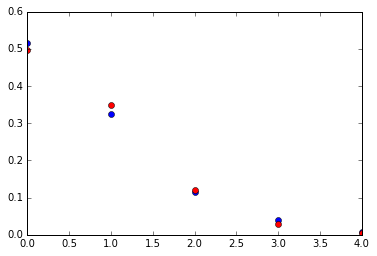

In [7]:
x = np.array((0.,1.,2.,3.,4.))
count_data = np.bincount(kick_data.ravel())/kick_data.ravel().shape[0]

plt.plot(x,count_data,'bo')

P = [mean**y*np.exp(-mean)/factorial(y) for y in x]

plt.plot(x,P,'ro')

plt.show()